## SELENIUM : Tool for Modern Web Automation and Better Web Scraping

### Introduction

Selenium is a tool which can be used for automating specific tasks on browsers, to test the web applications as well as perform better web scraping compared to beautiful soup. <br>
It can send the standard Python commands to different browsers, despite variation in their browser's design using the drivers.

These tasks can be performed in various ways, but the basic steps can be summarised as follows : <br>
<list>
    <li>Permit it to control web components like tap on buttons, using the browser driver.</li>
    <li>Automate tasks by entering content into structures or providing web components with specific commands. </li>
    <li>Explore the target application or website for web scraping or use automation to perform target actions.  </li>
</list>

### Selenium Webdriver

Selenium WebDriver is a web-based automation testing framework used to test web pages initiated on various web browsers and various operating systems. We can write test scripts in different programming languages like: Java, Perl, Python, Ruby, C#, PHP and JavaScript. Python is prefered due to it's ease of use. These webdrivers support batch testing, cross browser testing & data driven testing.

### Selenium Webdriver Architecture

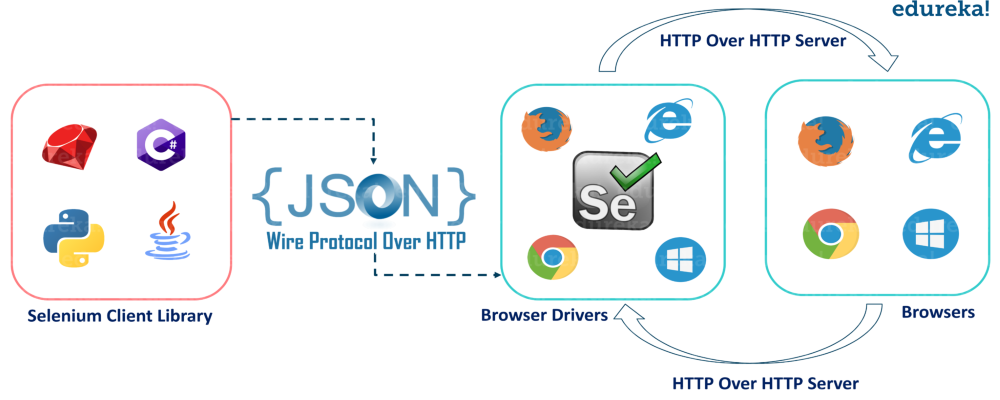

### Technical Terms

#### Browser Elements
Browser elements are various components of the web page. Some example of these elements are text boxes, buttons, images, hyperlinks, check boxes or radio buttons, text area or error messages, drop downs, tables and frames. These elements can be manipulated in numerous ways depending on the utility.

#### Locating the elements
In web development, every element is assigned unique attributes like id, name, class name, hyperlink text, etc. These elements can be located using some specific commands which are called 'Locators'. Handling these is essential for web automation as well as scraping because these are basically inside methods mainly responsible for almost everything. 

### Getting Started with Web Automation

After the basic overview, we will now look at the steps for basic connection and operations, which enable us to perform web automation using selenium with python. 

We will see how we can manipulate the famous Chromes DINO game using our python code.
( Note : Various unique and interesting tasks can be performed using selenium like login to any website of your choice, keep track or manipulate your browser history, communicate between different browsers etc. I am going to briefly demontrate game manipulation, which seemed as a new and interesting topic. ) 

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys

The basic setup consists of the above mentioned lines of code : 
<list>
    <li>Install the selenium library using pip.</li>
    <li>Importing the webdriver for connecting with the browser and setting it up according to our requirement.</li>
    <li>Importing the Options for manipulation of basic browser operations like audio settings. </li>
    <li>Importing Keys which will be used to handle the game and input the commands.</li>
    <li>Download the webdriver for chrome (the webdriver used depends on the target browser.)</li>
    <li>Set up the path to game and the driver.</li>
</list>

In [16]:
game_url = "chrome://dino"
chromebrowser_path = "chromedriver.exe"
init_script = "document.getElementsByClassName('runner-canvas')[0].id = 'runner-canvas'"

chrome_options = Options()
chrome_options.add_argument("disable-infobars")
chrome_options.add_argument("--mute-audio")

browser = webdriver.Chrome(executable_path = chromebrowser_path,chrome_options=chrome_options)
browser.set_window_position(x=-10,y=0)
browser.get('chrome://dino')
browser.execute_script("Runner.config.ACCELERATION=0")
browser.execute_script(init_script)
browser.implicitly_wait(30)
browser.maximize_window()

C:\Users\akans\AppData\Local\Continuum\anaconda3\envs\cs670\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


Once the imports are done and paths are defined, we can use options to handle the browser menu options. The webdriver is then used to connect to the game url.<br>
After running the above code snippet, a browser window pops up, which looks as follows :

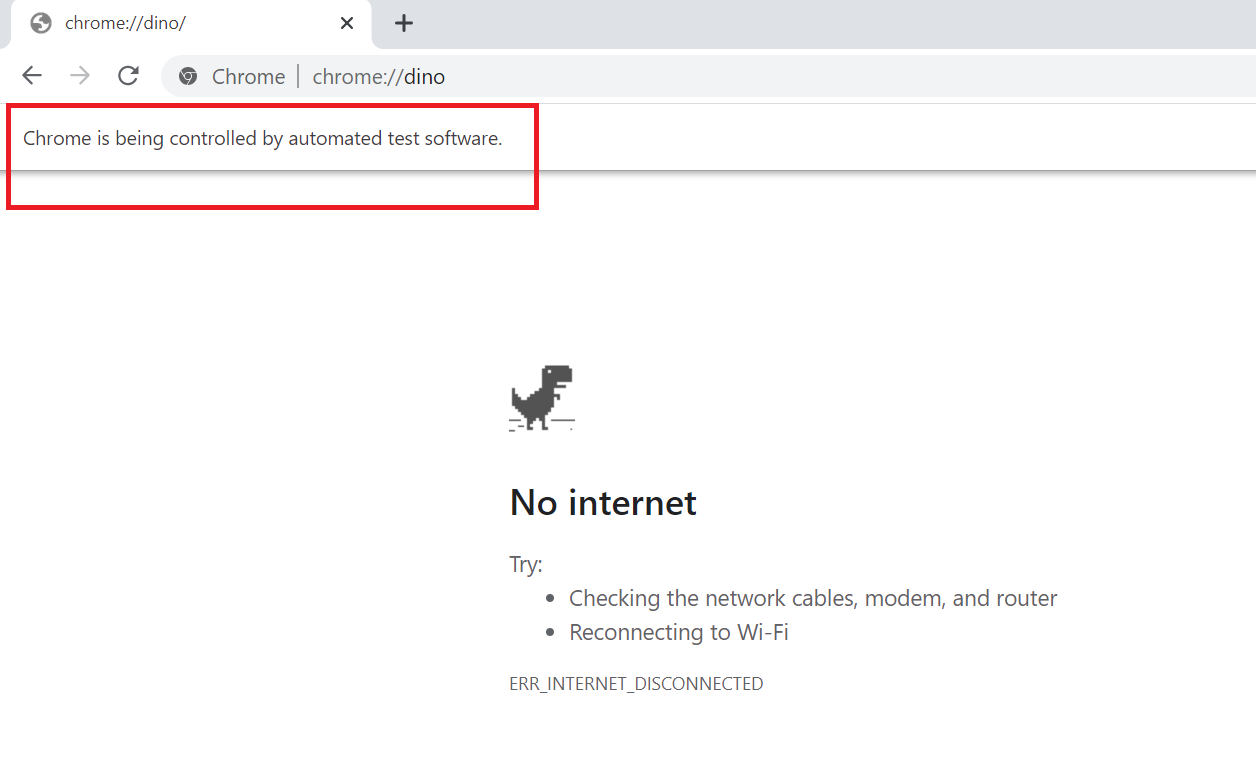

We can see in the highlighted part, it is mentioned "Chrome is being controlled by automated test software". This means that now we are connected with the browser using our python code and can proceed furthur with the instructions. 

We need to define a class whose object can be manipulated according to our commands, so now we will create a Game class which has all the initial settings as well as the basic acions we need to perform

In [23]:
game_url = "chrome://dino"
chromebrowser_path = "chromedriver.exe"
init_script = "document.getElementsByClassName('runner-canvas')[0].id = 'runner-canvas'"

class Game:
    def __init__(self,custom_config=True):
        chrome_options = Options()
        chrome_options.add_argument("disable-infobars")
        chrome_options.add_argument("--mute-audio")
        self.browser = webdriver.Chrome(executable_path = chromebrowser_path,chrome_options=chrome_options)
        self.browser.set_window_position(x=-10,y=0)
        self.browser.get('chrome://dino')
        self.browser.execute_script("Runner.config.ACCELERATION=0")
        self.browser.execute_script(init_script)
        self.browser.implicitly_wait(10)
        self.browser.maximize_window()

    def get_crashed(self):
        return self.browser.execute_script("return Runner.instance_.crashed")
    def get_playing(self):
        return self.browser.execute_script("return Runner.instance_.playing")
    def restart(self):
        self.browser.execute_script("Runner.instance_.restart()")
    def press_up(self):
        self.browser.find_element_by_tag_name("body").send_keys(Keys.ARROW_UP)
    def press_down(self):
        self.browser.find_element_by_tag_name("body").send_keys(Keys.ARROW_DOWN) 
    def press_right(self):
        self.browser.find_element_by_tag_name("body").send_keys(Keys.ARROW_RIGHT)

    def pause(self):
        return self.browser.execute_script("return Runner.instance_.stop()")
    def resume(self):
        return self.browser.execute_script("return Runner.instance_.play()")
    def end(self):
        self.browser.close()


In the Game class we define all the neccessary functions. 
The Game can have following possible actions (which are logical to perform in a Dino game) :
<list>
    <li>Press the up arrow key</li>
    <li>Press the down arrow key</li>
    <li>Press the right arrow key</li>
    <li>Play, pause, resume or restart the game</li>
</list>

The web elements can be given specific inputs to make that happen. For example, if we want Dino to jump, we use the following code snippet :<br>

<i>self.browser.find_element_by_tag_name("body").send_keys(Keys.ARROW_UP)<br></i>

In this we find the body element of the web page, and to that we send the arrow up key as input using the send_keys function. Similar functions can be written for each action. To control situations like game over, pause or resume we execute specific scripts using the execute_script function. After we are done making the Game class, we can use this to play the game.

This is how web automation is done using selenium, similarly many tasks can be performed automatically using browser driver, options, scripts and keys. This is a useful library of python which has significance in various domains.


### Getting Started with Web Scraping

Web Scraping refers to extracting significant information from large amount of unstructured data from the web. Various tools are used for scraping the web. The purpose of these tools is to analyze the HTML elements of the web pages and extract information from these pages. 

Beautiful Soup is a well known python library used for web scraping. In fact it can be said that it is the most prefered library in python for web scraping. The reason is the awesome functionalities it offers as well as the ease of its use on DOM elements.

But there are some tasks which are difficult to perform with just beautiful soup. It helps in extracting information from the websites but also limits our exploration when it comes to extracting information from certain links like the javascript links mentioned in some websites. With beautiful soup we will have to put in effort to access these links. Selenium comes in handy in such cases. Selenium can help us perform certain actions like clicking on the links in the website, through which we can explore all the information related to the website we are visiting by not just extracting information from that website but getting information from the websites related to or linked to it.

Lets see an example about how we can use selenium to perform web scraping on websites. We will be scraping the github repository using selenium to get the list of all repositories for a particular user.

In [60]:
from selenium import webdriver

In [61]:
option = webdriver.ChromeOptions()
browser = webdriver.Chrome(executable_path="chromedriver.exe", chrome_options=option)

C:\Users\akans\AppData\Local\Continuum\anaconda3\envs\cs670\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


In [62]:
browser.get("https://github.com/akanshaAgarwal?tab=repositories")

We start with the same basic steps : 
<list>
    <li>Import the webdriver</li>
    <li>Setup the options and the driver for the browser we want to use.</li>
    <li>Get the particular web page that we want to scrape</li>
</list>

In [66]:
# find_elements_by_xpath returns an array of selenium objects.
titles_element = browser.find_elements_by_xpath("//h3[@class='wb-break-all']")
# use list comprehension to get the actual repo titles and not the selenium objects.
titles = [x.text for x in titles_element]

In selenium we have multiple functions which help us in information retireval.
The find_elements_by_xpath returns an array of selenium objects according to the specified path.
We can retrieve information from various HTML tags using elements like id or class names.

For the above mentioned code snippet, we use class name 'wb-break-all' to extract information. All the repository names on github are within <b>h3</b> html tag with class name 'wb-break-all'. Hence we specify the path accordingly to get the objects which will have the name of repositories.

Once we have thes objects we can extract text from them which will be the name of repositories. 

As it can be seen in the highlighted portion of the image, we make use of web page source code in order to extract the name of the repositories. <br><br><br>

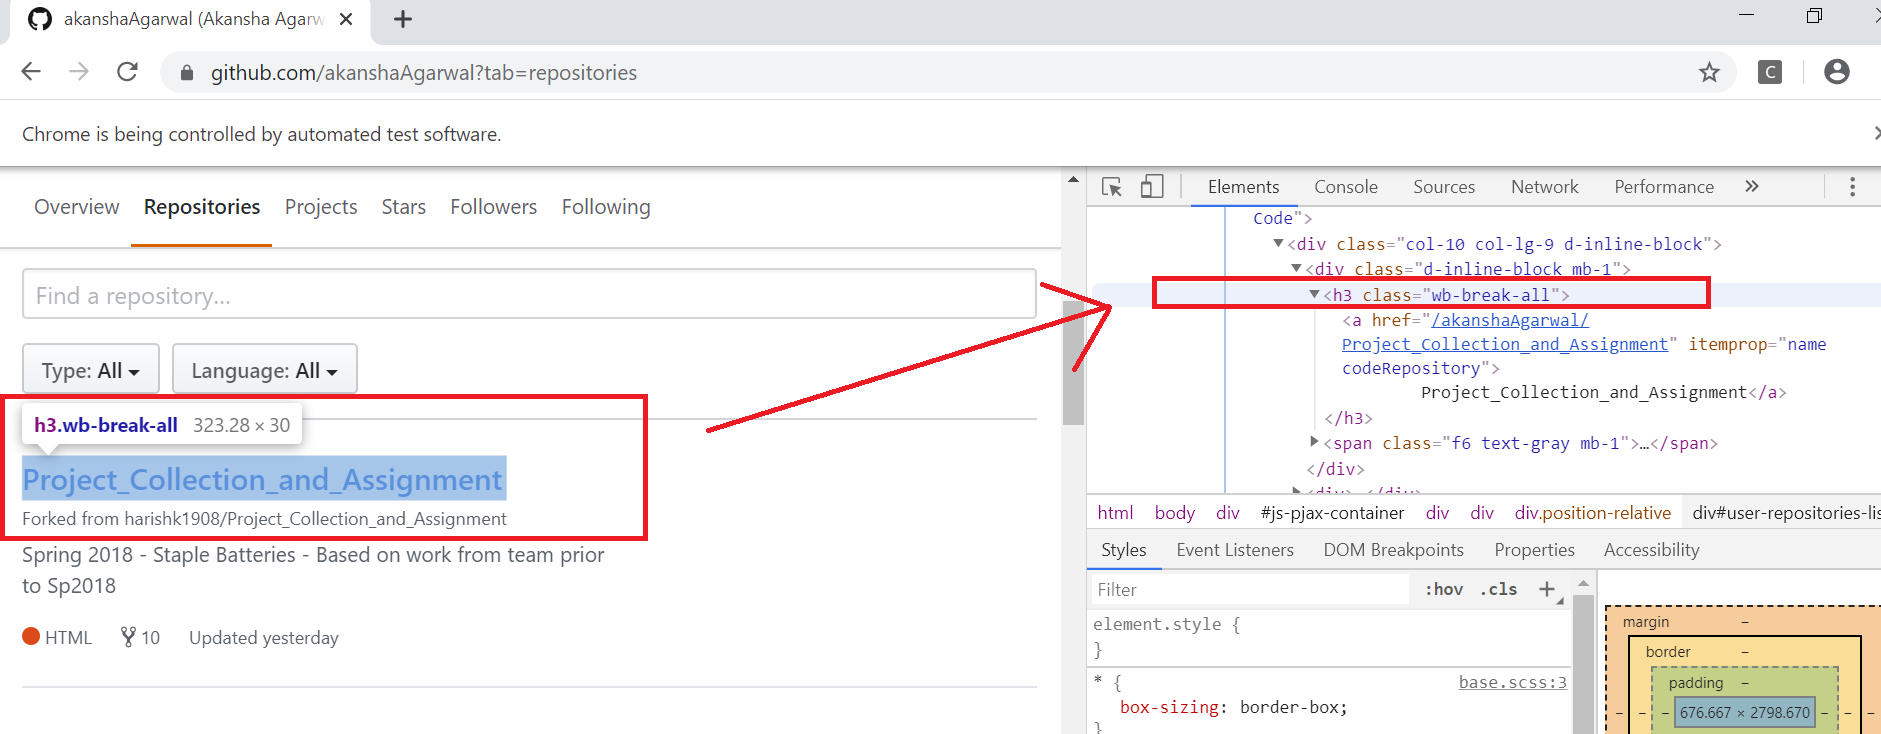




In [65]:
print("The list of repositories are as follows : \n")
for title in titles:
    print(title)


The list of repositories are as follows : 

Project_Collection_and_Assignment
typo
hw-acceptance-unit-test-cycle
My-Rails-App
rottenpotatoes-rails-intro
hw-ruby-intro
Somnolence-Detection-for-Vehicular-Aid
Movie-Genre-Classification-from-Posters-using-Convolutional-Neural-Networks
Automatic-Data-Flow-Diagram-
Machine-Learning-Codes-from-Scratch-in-Python-
Seam-Carving-Image-Processing
Network-Simulator
Mobile-Shop-GUI
Emulator-SimpleRisc-AssemblyLanguage-
Cyclic-Redundancy-Check
Hamming-Code
Line-Coding-with-JOGL
html-css-editor-app


#### References

Following is the list of references used for this spotlight : 
<list>
    <li>https://www.edureka.co/blog/selenium-tutorial</li>
    <li>https://medium.com/analytics-vidhya/reinforcement-learning-dino-bot-613c6daeea5d</li>
    <li>https://medium.com/the-andela-way/introduction-to-web-scraping-using-selenium-7ec377a8cf72</li>
</list>